# Simple linear regression with Scikit-Learn

Here, we will create a program that will do a simple linear regression using the Scikit-Learn library.
This program will contain research analysis and result explainations

## First - Lets import our libraries

In [39]:
import numpy as np #We will be using numpy to load our data and do our matrix operations
from sklearn.linear_model import LinearRegression #We will be using scikit-learn as our machine learning library
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Second - Lets load our data with numpy

In [2]:
data = np.genfromtxt(fname = "SensData.csv", delimiter=",", names=["x", "y"]);   '''Since we are loading a csv file, 
                                                                                we specify the type of delimiter
                                                                                we have also specify the data names
                                                                                to make the retrieval more readable'''

### What kind of data do we have ?

The data we have loaded is a set of coordinates that follows a linear model, which will help us validate the and see our predicted model with Scikit-Learn

In [3]:
#Lets have a look of our data in a raw form (matrix way)
data

array([(2.0659, 0.77919), (2.3684, 0.91597), (2.54  , 0.90538),
       (2.5421, 0.90566), (2.5491, 0.93899), (2.7867, 0.96685),
       (2.9117, 0.96437), (3.0356, 0.91446), (3.1147, 0.93934),
       (3.1582, 0.96075), (3.3276, 0.89837), (3.3793, 0.9121 ),
       (3.4122, 0.94238), (3.4216, 0.96625), (3.5316, 1.0527 ),
       (3.6393, 1.0144 ), (3.6733, 0.95969), (3.9256, 0.96854),
       (4.0499, 1.0766 ), (4.2483, 1.1455 ), (4.344 , 1.0341 ),
       (4.3827, 1.007  ), (4.4231, 0.96684), (4.6102, 1.0896 ),
       (4.6881, 1.0634 ), (4.9777, 1.1237 ), (5.036 , 1.0323 ),
       (5.0685, 1.0874 ), (5.4161, 1.0703 ), (5.4396, 1.1606 ),
       (5.4563, 1.0778 ), (5.5698, 1.107  ), (5.6016, 1.0972 ),
       (5.6878, 1.1649 ), (5.7216, 1.1412 ), (5.8539, 1.0844 ),
       (6.1978, 1.1252 ), (6.3511, 1.1168 ), (6.4797, 1.1971 ),
       (6.7384, 1.2069 ), (6.8638, 1.1251 ), (7.0223, 1.1236 ),
       (7.0782, 1.2133 ), (7.1514, 1.2523 ), (7.4664, 1.2497 ),
       (7.5974, 1.18   ), (7.7441, 1.189

### Lets plot our data 

This way, we will be able to see that our data is based of a linear model

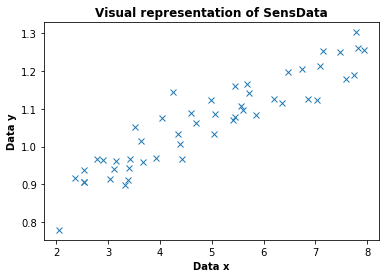

In [4]:
x = data["x"]; #Get the values in our x column
y = data["y"]; #Get the values in out y column
plt.title('Visual representation of SensData', fontweight="bold");
plt.xlabel("Data x", fontweight="bold");
plt.ylabel("Data y", fontweight="bold");
plt.plot(x,y,'x',label="The data");
plt.show()

## Third - Lets do our linear regression

Here we want to predict the value of "Data y" based on a feature "Data x".

#### Quick reminders:

A linear model is described as the following formula: 
\begin{align}
y = ax + b
\end{align}

In our case the linear model is described as follow: 
\begin{align}
h(x) = \theta_0 x_0 + \theta_1 x_1; x_0  = 1
\end{align}

since x0 is always going to have the value of 1, we can rewrite our model formula as follow:

\begin{align}
h(x) = \theta_0 + \theta_1 x_1
\end{align}

As we can see, our linear model looks a lot like the linear formula if we substitute the following variabes:

<ul>
 <li> h(x) <==> y
 <li> &thetasym;0 <==> b
 <li> &thetasym;1 x1 <==> ax
</ul>

#### Variables description:
<ul>
 <li> <b>h(x)</b>: Is the predicted output value from an input feature vector
 <li> <b>&thetasym;0</b>: Is the intercept of the function
 <li> <b>&thetasym;1</b>: Is the learned parameter value from our data
 <li> <b>x1</b>: Is the input value we want to predict
</ul>

### Lets create our regression model

In [5]:
model = LinearRegression(); #Creates a simple unnormalized data model

### Lets fit our model with our data

In [6]:
xFeatureVector = x.reshape(-1,1); #Since we have a single feature (x is a 1D array) and that the "fit" method expects a 2D,
                     #we need to reshape our feature vector x;
model.fit(xFeatureVector, y); #We are mapping our feature vector x with our output vector y

### Lets see what happened there !

<ol>
    <li>We have created a linear data model with unnormalized data</li>
    <li>We have computed a fit on the data. Essentially we have estimated what is the best line that fits our data</li>
</ol>

### Lets have a look of our variables

In [7]:
print ('Estimated theta0 (intercept) coefficient:', model.intercept_);

Estimated theta0 (intercept) coefficient: 0.750167784345263


In [8]:
print ('Estimated theta1 coefficient:', model.coef_[0]); #Here we only have one feature so we can directly print it

Estimated theta1 coefficient: 0.06387975236997191


### Lets print our model formula

In [9]:
b = model.intercept_;
a = model.coef_[0];
print ('h(x) = {0} + {1} * x'.format(b,a));

h(x) = 0.750167784345263 + 0.06387975236997191 * x


### Lets predict some values of x

Here, we are going to predict the output value of the following input values {3.5, 5, 5.5, 7}

In [10]:
xToPredict = [3.5, 5, 5.5, 7];

for val in xToPredict:
    print ('The predicted value of {0}\tis\t{1}'.format(val, model.predict(val)[0]));

The predicted value of 3.5	is	0.9737469176401647
The predicted value of 5	is	1.0695665461951225
The predicted value of 5.5	is	1.1015064223801085
The predicted value of 7	is	1.1973260509350663


### Lets calculate our lost with the mean square error

In [40]:
ypredicted = [];
for val in x:
    ypredicted.append(model.predict(val)[0]); #Get the predicted values from our original dataset
    
print("Mean square error: {0}".format(mean_squared_error(y,ypredicted)))

Mean square error: 0.0019743600067480046


### Lets see the fit of our model to our original data

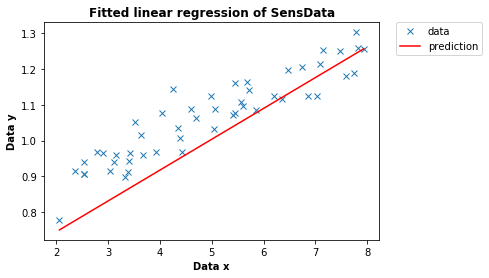

In [15]:
min_x = min(x);
max_x = max(x);

plt.title('Fitted linear regression of SensData', fontweight="bold");
plt.xlabel("Data x", fontweight="bold");
plt.ylabel("Data y", fontweight="bold");
plt.plot(x,y, 'x', label="data"); #Our original data
plt.plot([min_x, max_x], [b, a * max_x + b], color="r", label="prediction");#Showing the line starting from the intercept (b) and 
                                                        #finishng at the predicted value of max_x (a * max_x + b)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

### Conclusion

As we can see our linear regression model is able to represent the trend from our input data.